In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc

In [4]:
data = pd.read_csv('smoke_detection_iot.csv', index_col=0)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


There are no missing values in the dataset, and all of the data is numeric.

In [6]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


Average temperature is 15.9C and at Maximum 59.9 C


In [7]:
## Correlations bewteen Fire Alarm and other variables
data.corr()['Fire Alarm'][:-1].sort_values(ascending=False)

CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

<AxesSubplot:>

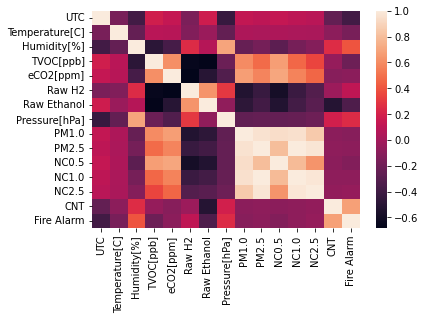

In [8]:
sns.heatmap(data.corr())

In [11]:
predicting_column = 'Fire Alarm'
X = data.loc[:, data.columns != predicting_column]
y = data[[predicting_column]]

In [12]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


In [13]:
data['Fire Alarm'].value_counts(normalize=True)

1    0.714626
0    0.285374
Name: Fire Alarm, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
Target = {}
Target[0] = y_test.value_counts(normalize=True)[1]
Target[1] = y_test.value_counts(normalize=True)[0]

In [19]:
def train_evaluate(estimator, name, X_train, X_test, y_train, y_test):
    result = {}
    result['Estimator'] = name
    estimator.fit(X_train, y_train.values.ravel())
    y_pred = estimator.predict(X_test)
    result['Accuracy'] = accuracy_score(y_true=y_test, y_pred=y_pred)
    result['Precision'] = precision_score(y_true=y_test, y_pred=y_pred)
    result['Recall'] = recall_score(y_true=y_test, y_pred=y_pred)
    result['F1'] = f1_score(y_true=y_test, y_pred=y_pred)
    return result

In [23]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [44]:
from sklearn.metrics import classification_report

In [45]:
LR_preds = LR.predict(X_test)

In [49]:
print(classification_report(LR_preds,y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3784
           1       0.96      0.99      0.97      8742

    accuracy                           0.96     12526
   macro avg       0.97      0.95      0.96     12526
weighted avg       0.96      0.96      0.96     12526



In [37]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_preds = KN.predict(X_test)
print(classification_report(KN_preds, y_test))

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3576
           1       1.00      1.00      1.00      8950

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [38]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_preds = RF.predict(X_test)
print(classification_report(RF_preds, y_test))

C:\Users\Kenny\AppData\Local\Temp/ipykernel_3420/359015944.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [39]:
GB=GaussianNB()
GB.fit(X_train,y_train)
GB_preds = GB.predict(X_test)
print(classification_report(GB_preds, y_test))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64      2017
           1       0.97      0.83      0.90     10509

    accuracy                           0.84     12526
   macro avg       0.74      0.86      0.77     12526
weighted avg       0.90      0.84      0.85     12526



C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
AD=AdaBoostClassifier()
AD.fit(X_train,y_train)
AD_preds = AD.predict(X_test)
print(classification_report(AD_preds, y_test))

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3574
           1       1.00      1.00      1.00      8952

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [41]:
SVC=SVC()
SVC.fit(X_train,y_train)
SVC_preds = SVC.predict(X_test)
print(classification_report(SVC_preds, y_test))

C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3572
           1       1.00      1.00      1.00      8954

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



# Conclusion
While there are neagtive correlations between Fire Alarm and ten (10) variables in the dataset; There is a positive but weak correlation between Fire Alarm and Humidity, Pressure and Raw H2; a bitter for  NT.

KNeighborsClassifier, SUpport Vector Machines, AdaBoostClassifier and RandomForestClassifier had perfect prediction than other models used. However, the model parameters were not adjusted. Also it is most likely to have a diffrenet outcome with more randomness. 